In [1]:
from pandas import read_csv
A = read_csv("C:/Users/Dell/Desktop/HR-Employee-Attrition-Table 1.csv")

In [2]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
for i in A.columns:
    if(A[i].dtypes == "object"):
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)
        
        

In [4]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
A.shape

(1470, 35)

In [6]:
for i in A.columns:
    print(i,len(A[i].unique()))

Attrition 2
Age 43
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [7]:
Y = A[["Attrition"]]
X = A.drop(labels=["Attrition","EmployeeNumber"],axis=1)

In [8]:
X.skew()


C:\Users\Dell\AppData\Local\Temp/ipykernel_17804/4026149454.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [9]:
A.shape

(1470, 35)

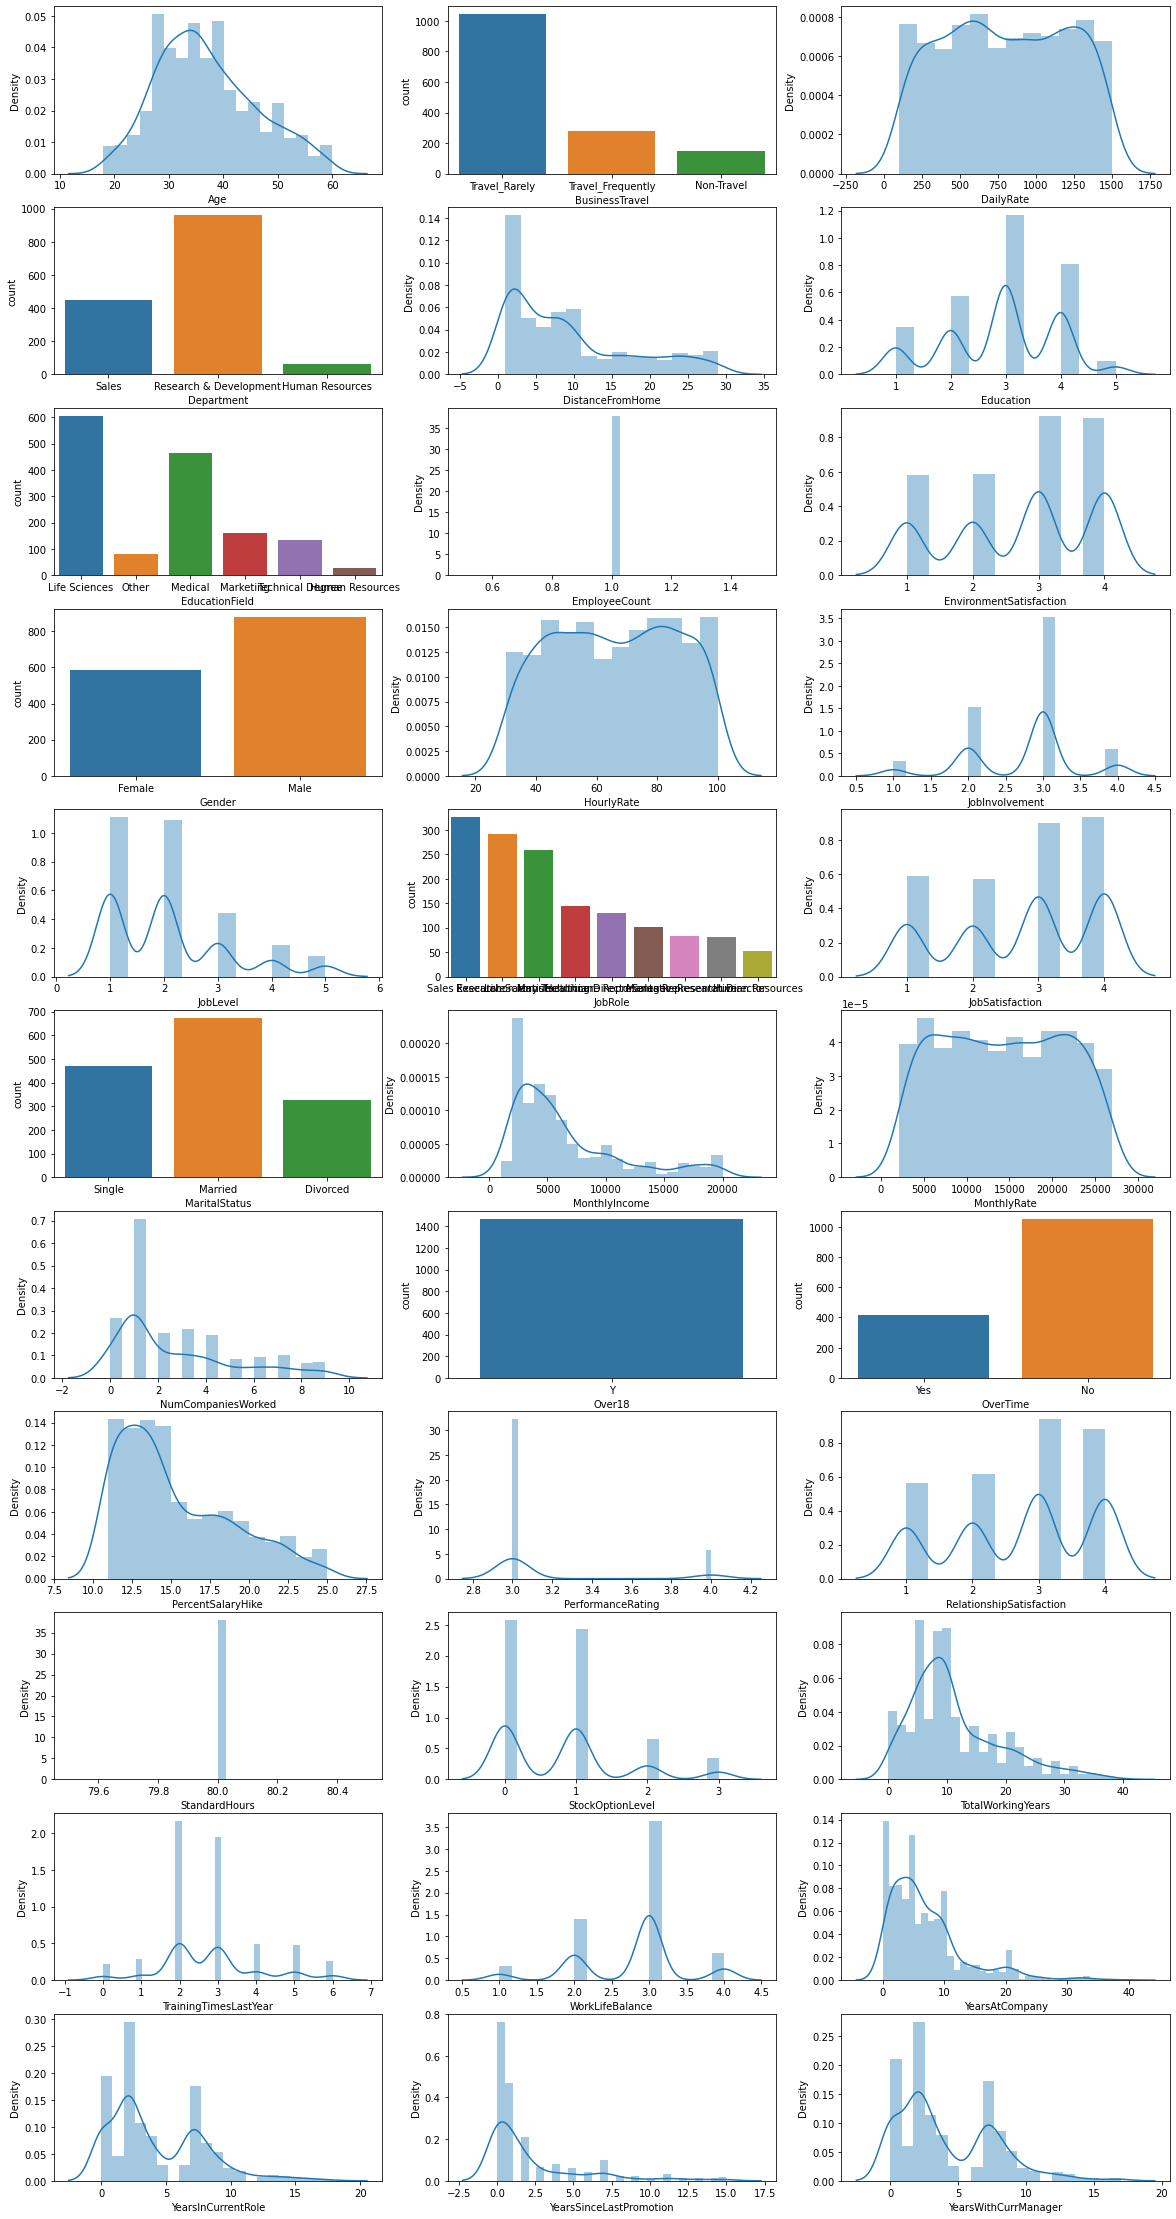

In [10]:
from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
q = 1
import seaborn as sb
for i in X.columns:
    if(X[i].dtypes == "object"):
        plt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
    else:
        plt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

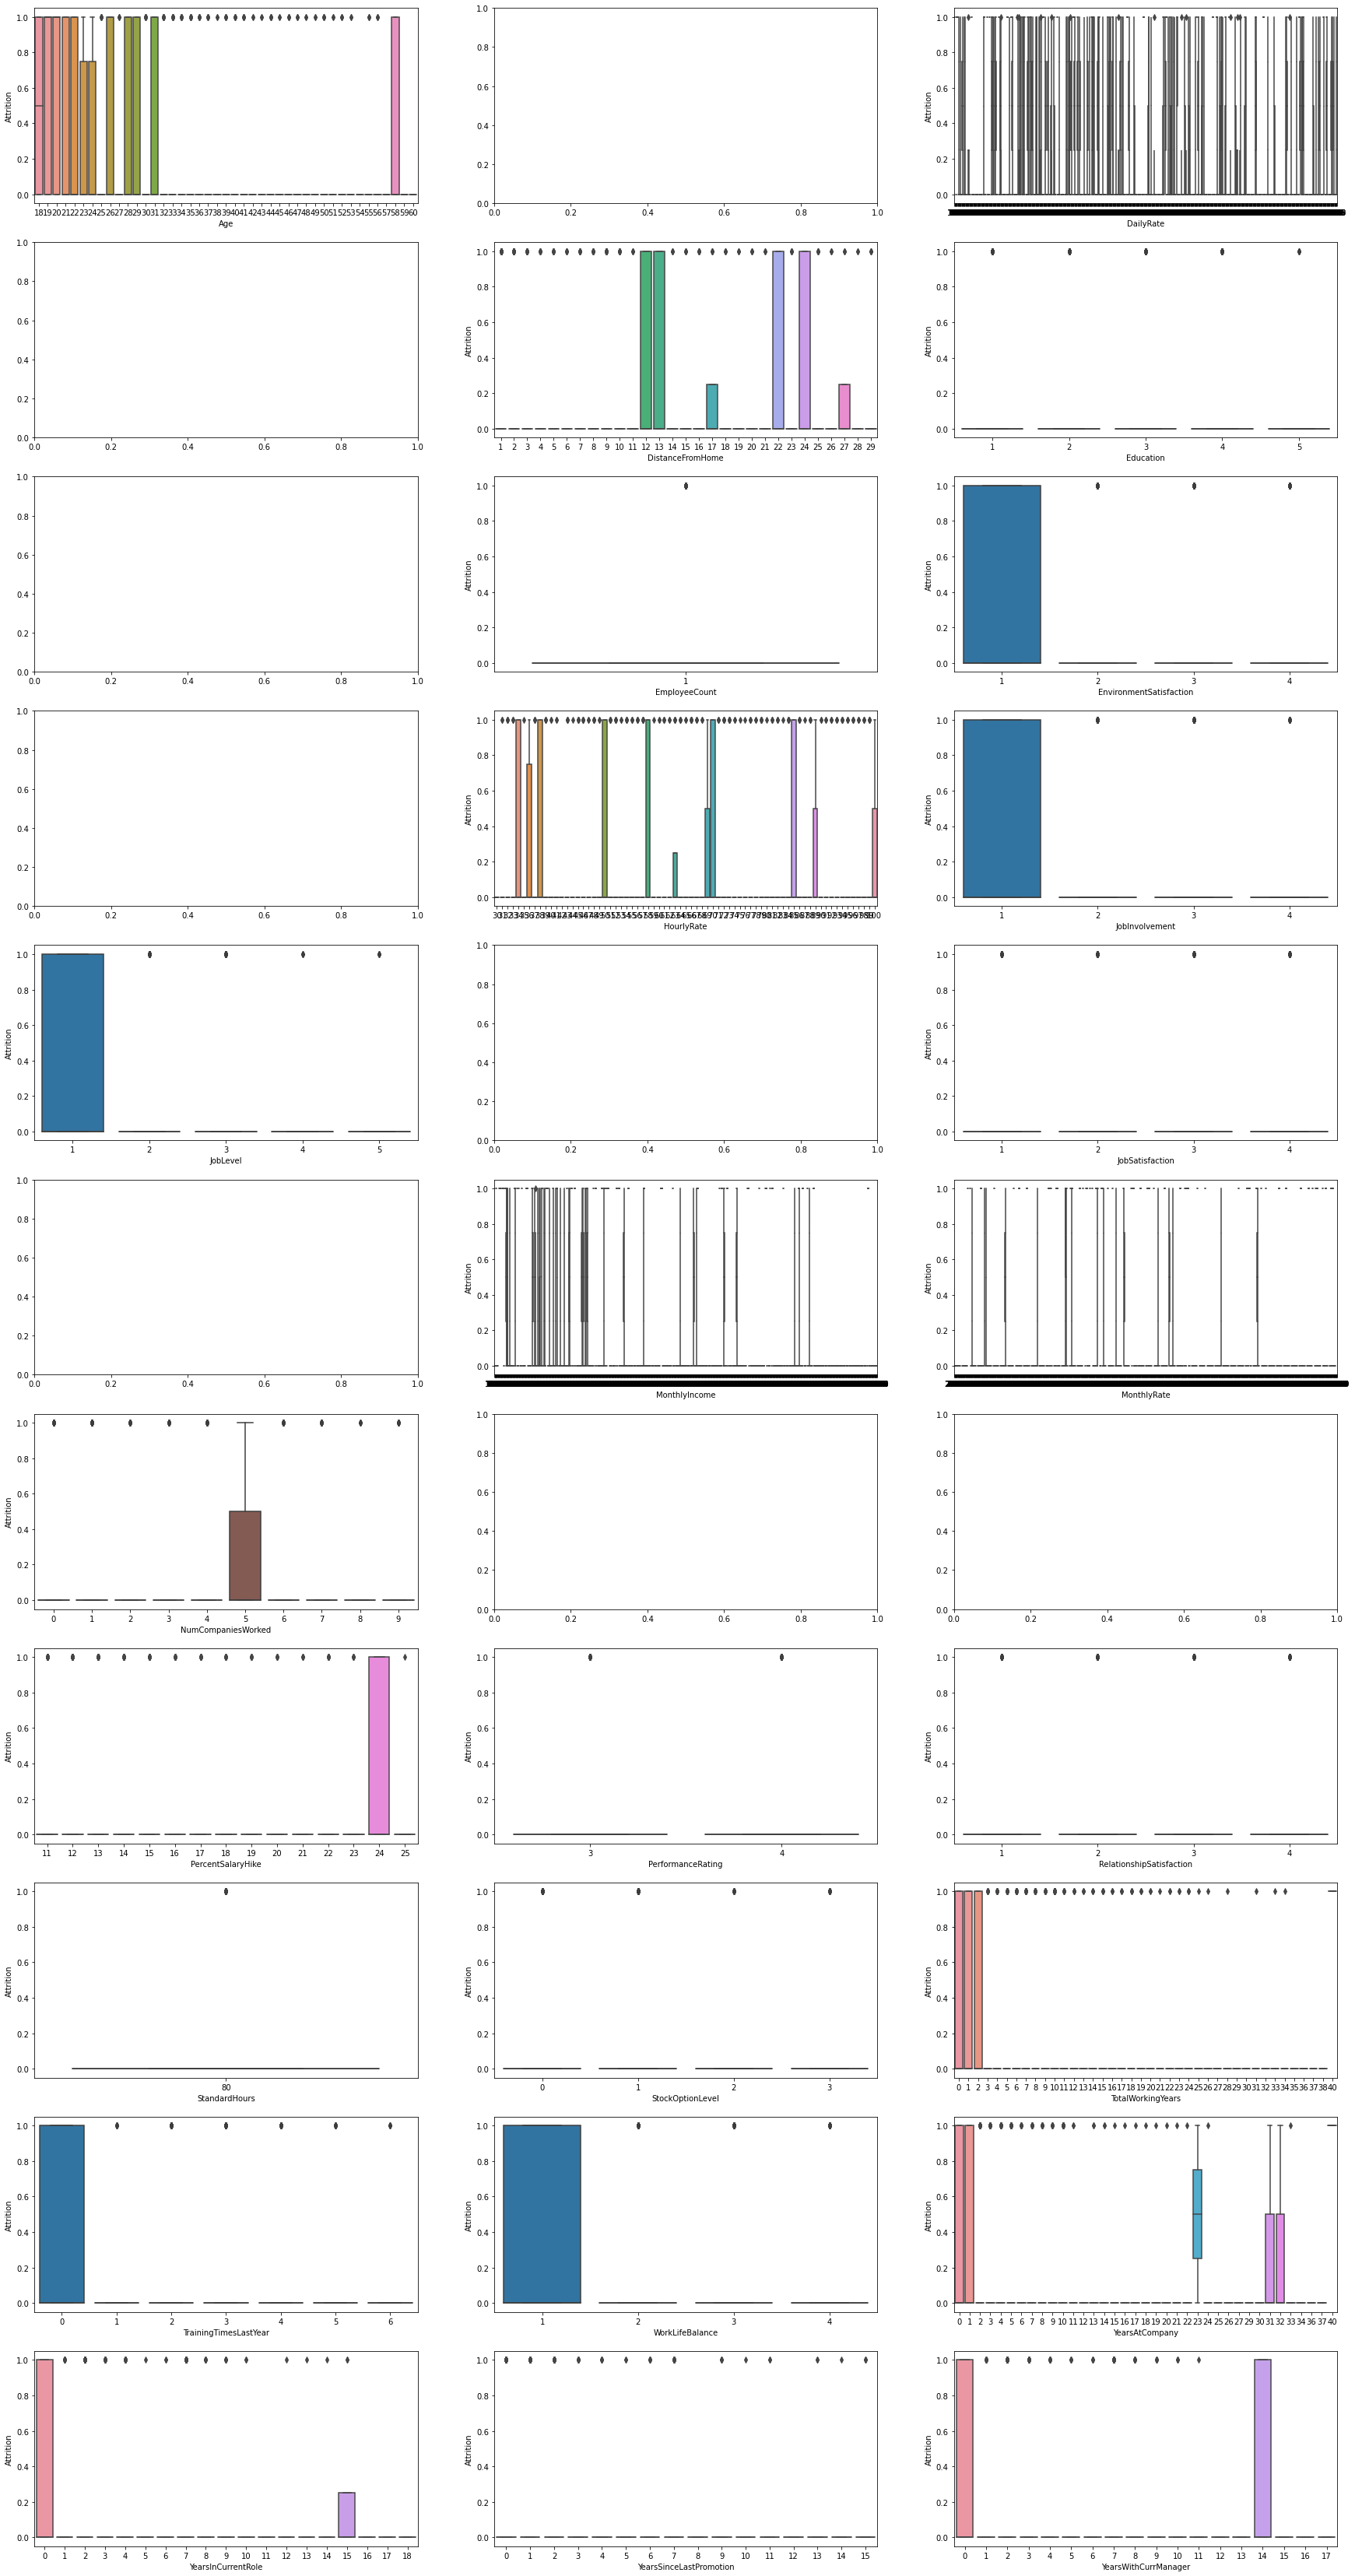

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import crosstab
import pandas as pd
plt.figure(figsize=(30,60))
q = 1
for i in X.columns:
    if(X[i].dtypes == "object"):
        plt.subplot(11,3,q)
        pd.crosstab(X[i],Y.Attrition)
        q = q + 1
    else:
        plt.subplot(11,3,q)
        sb.boxplot(X[i],Y.Attrition)
        q = q + 1

In [12]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [13]:

for col in con:
    W = []
    for i in X[col]:
        if(i==0):
            W.append(1)
        else:
            W.append(i)
    X[col] = W
        

            

In [14]:
import numpy as np
X[con] = X[con].apply(np.log)

In [15]:
X[con].skew()

Age                        -0.154166
DailyRate                  -0.927176
DistanceFromHome           -0.246004
Education                  -1.103042
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.816277
HourlyRate                 -0.457353
JobInvolvement             -1.471683
JobLevel                    0.219763
JobSatisfaction            -0.810766
MonthlyIncome               0.286192
MonthlyRate                -0.815685
NumCompaniesWorked          0.487962
PercentSalaryHike           0.494566
PerformanceRating           1.921883
RelationshipSatisfaction   -0.817149
StandardHours               0.000000
StockOptionLevel            2.060960
TotalWorkingYears          -0.884237
TrainingTimesLastYear      -0.261185
WorkLifeBalance            -1.551107
YearsAtCompany             -0.278255
YearsInCurrentRole          0.032164
YearsSinceLastPromotion     1.223098
YearsWithCurrManager        0.038302
dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
import pandas as pd
Xcon = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [18]:
Xcon

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.541894,0.747478,-1.644714,-0.677439,0.0,-0.403710,1.219344,0.435556,0.199807,0.976162,...,-1.813401,8.881784e-16,-0.431378,-0.084856,-2.173885,-3.123522,0.229030,0.274269,-0.661158,0.573238
1,1.254547,-1.332609,0.317324,-2.268099,0.0,0.409307,-0.072813,-0.850845,0.199807,-0.401689,...,1.000748,8.881784e-16,-0.431378,0.185883,0.339041,0.400046,0.791711,0.954880,-0.661158,0.976782
2,0.131474,1.080419,-0.990702,-0.677439,0.0,0.986151,1.155080,-0.850845,-1.145879,0.404302,...,-0.406327,8.881784e-16,-0.431378,-0.246869,0.339041,0.400046,-1.744615,-1.411758,-0.661158,-1.357022
3,-0.325949,1.101230,-0.608129,0.913222,0.0,0.986151,-0.328370,0.435556,-1.145879,0.404302,...,0.416759,8.881784e-16,-0.431378,-0.084856,0.339041,0.400046,0.545916,0.954880,0.698757,-1.357022
4,-1.128248,-0.196003,-0.990702,-2.268099,0.0,-1.793572,-1.333814,0.435556,-1.145879,-0.401689,...,1.000748,8.881784e-16,-0.431378,-0.433899,0.339041,0.400046,-0.981105,-0.568745,0.196853,-0.525704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.021930,0.413698,1.313752,-0.677439,0.0,0.409307,-1.260027,1.348272,0.199807,0.976162,...,0.416759,8.881784e-16,-0.431378,0.829691,0.339041,0.400046,0.028201,-0.568745,-0.661158,-0.039415
1466,0.341948,-0.140659,0.045884,-2.268099,0.0,0.986151,-1.188019,-0.850845,0.986983,-1.779540,...,-1.813401,8.881784e-16,-0.431378,0.058049,1.507484,0.400046,0.398829,0.954880,-0.661158,0.976782
1467,-1.128248,-2.222668,-0.336689,0.253038,0.0,-0.403710,0.988098,1.348272,0.199807,-0.401689,...,-0.406327,8.881784e-16,-0.431378,-0.433899,-2.173885,0.400046,0.229030,-0.568745,-0.661158,-0.039415
1468,1.254547,0.634836,-0.990702,0.253038,0.0,0.986151,0.023589,-0.850845,0.199807,-0.401689,...,1.000748,8.881784e-16,-0.431378,0.829691,0.339041,-0.900398,0.675655,0.767400,-0.661158,1.136931


In [19]:
Xcat = pd.get_dummies(X[cat])

In [20]:


X = Xcat.join(Xcon)

In [21]:
X

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,-1.813401,8.881784e-16,-0.431378,-0.084856,-2.173885,-3.123522,0.229030,0.274269,-0.661158,0.573238
1,0,1,0,0,1,0,0,1,0,0,...,1.000748,8.881784e-16,-0.431378,0.185883,0.339041,0.400046,0.791711,0.954880,-0.661158,0.976782
2,0,0,1,0,1,0,0,0,0,0,...,-0.406327,8.881784e-16,-0.431378,-0.246869,0.339041,0.400046,-1.744615,-1.411758,-0.661158,-1.357022
3,0,1,0,0,1,0,0,1,0,0,...,0.416759,8.881784e-16,-0.431378,-0.084856,0.339041,0.400046,0.545916,0.954880,0.698757,-1.357022
4,0,0,1,0,1,0,0,0,0,1,...,1.000748,8.881784e-16,-0.431378,-0.433899,0.339041,0.400046,-0.981105,-0.568745,0.196853,-0.525704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0.416759,8.881784e-16,-0.431378,0.829691,0.339041,0.400046,0.028201,-0.568745,-0.661158,-0.039415
1466,0,0,1,0,1,0,0,0,0,1,...,-1.813401,8.881784e-16,-0.431378,0.058049,1.507484,0.400046,0.398829,0.954880,-0.661158,0.976782
1467,0,0,1,0,1,0,0,1,0,0,...,-0.406327,8.881784e-16,-0.431378,-0.433899,-2.173885,0.400046,0.229030,-0.568745,-0.661158,-0.039415
1468,0,1,0,0,0,1,0,0,0,1,...,1.000748,8.881784e-16,-0.431378,0.829691,0.339041,-0.900398,0.675655,0.767400,-0.661158,1.136931


In [22]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y),columns=["Attrition"])

In [23]:

Y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [25]:
from keras.layers import Dense
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(32,input_dim =X.shape[1]))
nn.add(Dense(32))
nn.add(Dense(1,activation="sigmoid"))

In [26]:
nn.compile(loss="binary_crossentropy",metrics=['accuracy'])
nn.fit(xtrain,ytrain,batch_size=50,validation_split=0.2,epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 23ms/step - loss: 0.4583 - accuracy: 0.8053 - val_loss: 0.4355 - val_accuracy: 0.8305
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3604 - accuracy: 0.8511 - val_loss: 0.4001 - val_accuracy: 0.8390
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.8713 - val_loss: 0.3769 - val_accuracy: 0.8475
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.8830 - val_loss: 0.3653 - val_accuracy: 0.8432
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3114 - accuracy: 0.8851 - val_loss: 0.3563 - val_accuracy: 0.8559
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8947 - val_loss: 0.3525 - val_accuracy: 0.8517
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8936 - val_loss: 0.3495 - val_accuracy: 0.8559
Epoch 8/100


In [27]:
nn.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])
nn.fit(xtrain,ytrain,batch_size=50,validation_split=0.2,epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 9ms/step - loss: 0.2868 - accuracy: 0.8968 - val_loss: 0.3410 - val_accuracy: 0.8686
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8989 - val_loss: 0.3332 - val_accuracy: 0.8771
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9032 - val_loss: 0.3344 - val_accuracy: 0.8771
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.9021 - val_loss: 0.3348 - val_accuracy: 0.8686
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8979 - val_loss: 0.3357 - val_accuracy: 0.8771
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8979 - val_loss: 0.3332 - val_accuracy: 0.8729
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9011 - val_loss: 0.3384 - val_accuracy: 0.8644
Epoch 8/100
1

In [28]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
opt = SGD(momentum=0.1,nesterov=True)
es = EarlyStopping(patience=10,monitor="val_accuracy")
nn = Sequential()

In [29]:
nn.add(Dense(128,input_dim=X.shape[1]))
nn.add(Dropout(0.2))
nn.add(Dense(128))
nn.add(Dropout(0.2))
nn.add(Dense(128))
nn.add(Dense(1,activation="sigmoid"))



In [30]:
nn.compile(optimizer= opt,loss="binary_crossentropy",metrics=['accuracy'])
nn.fit(xtrain,ytrain,batch_size=50,validation_split=0.2,epochs=100,callbacks=es)

Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 0.5185 - accuracy: 0.7660 - val_loss: 0.4260 - val_accuracy: 0.8220
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.8319 - val_loss: 0.4012 - val_accuracy: 0.8347
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3958 - accuracy: 0.8532 - val_loss: 0.3889 - val_accuracy: 0.8390
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8574 - val_loss: 0.3774 - val_accuracy: 0.8432
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8649 - val_loss: 0.3695 - val_accuracy: 0.8517
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8553 - val_loss: 0.3612 - val_accuracy: 0.8517
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8691 - val_loss: 0.3559 - val_accuracy: 0.8517
Epoch 8/100
1

In [31]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(128,input_dim=xtrain.shape[1]))
    x = hp.Int("units",min_value=32,max_value=256,step=32)
    nn.add(Dense(units=x))
    y = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    nn.add(Dropout(rate=y))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [32]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
            objective="val_accuracy",
            max_epochs=10,
            directory="/users/Dell/Desktop/KT_NN5",
            project_name="Keras_TUNER")

INFO:tensorflow:Reloading Oracle from existing project /users/Dell/Desktop/KT_NN5\Keras_TUNER\oracle.json
INFO:tensorflow:Reloading Tuner from /users/Dell/Desktop/KT_NN5\Keras_TUNER\tuner0.json


In [33]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss",patience=25)

In [34]:
tuner.search(xtrain,ytrain,epochs=500,validation_split=0.2,callbacks=[es])

INFO:tensorflow:Oracle triggered exit


In [35]:
tuner.get_best_hyperparameters()[0].get("rate")


0.5

In [36]:
tuner.get_best_hyperparameters()[0].get("units")


160

In [38]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
opt = SGD(momentum=0.1,nesterov=True)
es = EarlyStopping(patience=10,monitor="val_accuracy")
nn = Sequential()
nn.add(Dense(128,input_dim=X.shape[1]))
nn.add(Dense(160))
nn.add(Dropout(0.5))
nn.add(Dense(1,activation="sigmoid"))
nn.compile(optimizer= opt,loss="binary_crossentropy",metrics=['accuracy'])
nn.fit(xtrain,ytrain,batch_size=50,validation_split=0.2,epochs=100,callbacks=es)


Epoch 1/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6096 - accuracy: 0.6957 - val_loss: 0.4657 - val_accuracy: 0.8136
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8000 - val_loss: 0.4222 - val_accuracy: 0.8263
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8255 - val_loss: 0.4056 - val_accuracy: 0.8347
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8340 - val_loss: 0.3941 - val_accuracy: 0.8347
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8436 - val_loss: 0.3869 - val_accuracy: 0.8390
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8500 - val_loss: 0.3812 - val_accuracy: 0.8390
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8585 - val_loss: 0.3776 - val_accuracy: 0.8390
Epoch 8/100
1